In [5]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from scipy import stats

%matplotlib inline
from matplotlib.pyplot import xticks

In [6]:
data = pd.read_csv(r"C:\Users\vaide\OneDrive\Desktop\CarPrice_Assignment.csv")

In [7]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data.shape

(205, 26)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
data.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [12]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
sum(data.duplicated(subset = 'car_ID')) == 0

True

In [14]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]
# There are no NULL values in the dataset, hence dataset is clean.

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

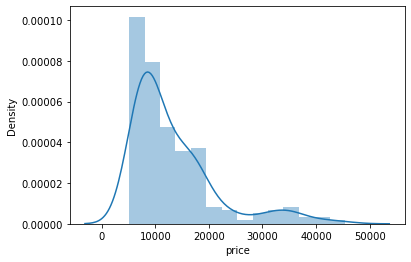

In [15]:
# Price: Target Variable Distribution
data.price.describe()
sns.distplot(data['price'])

<Figure size 720x432 with 0 Axes>

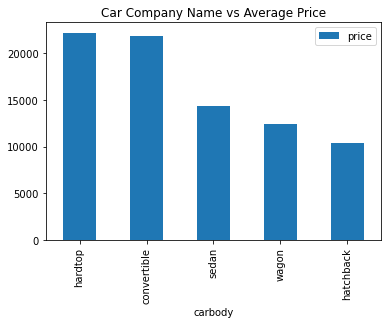

In [16]:
plt.figure(figsize=(10, 6))

df_autoy = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

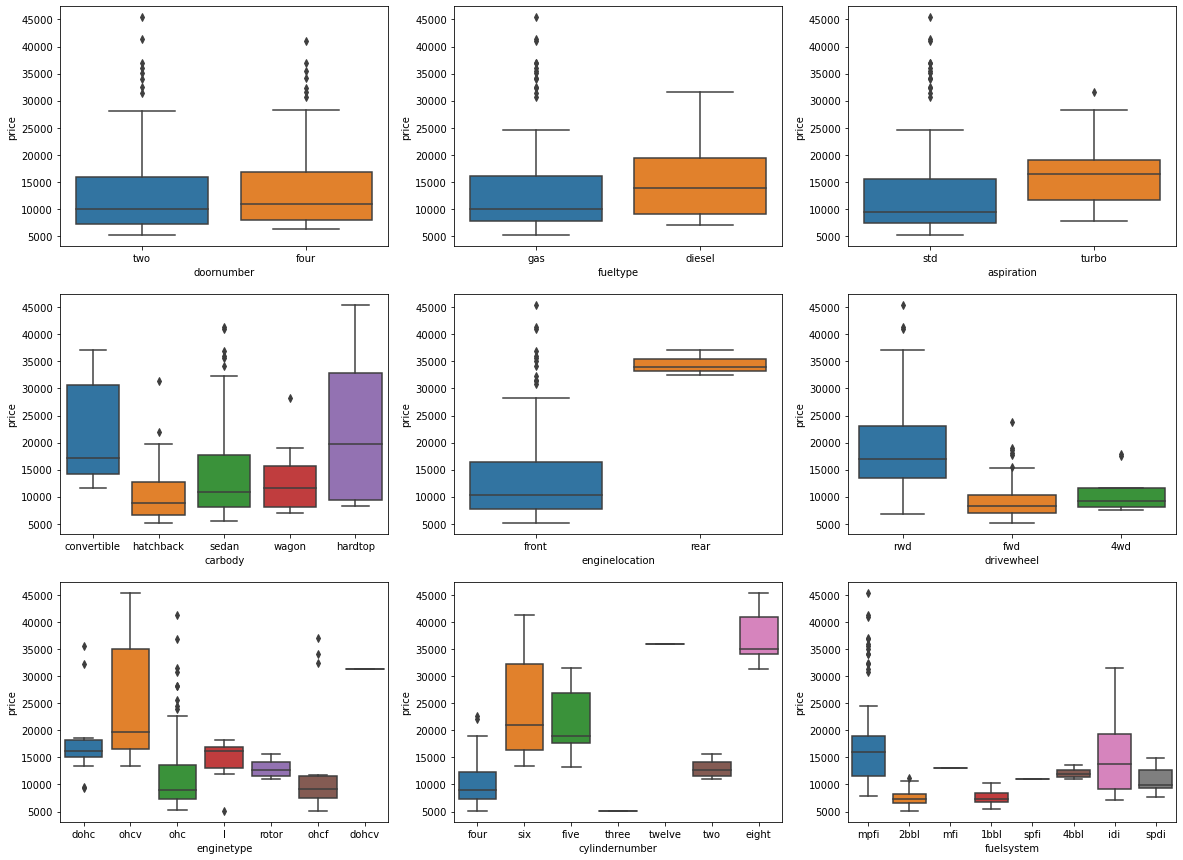

In [17]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.show()

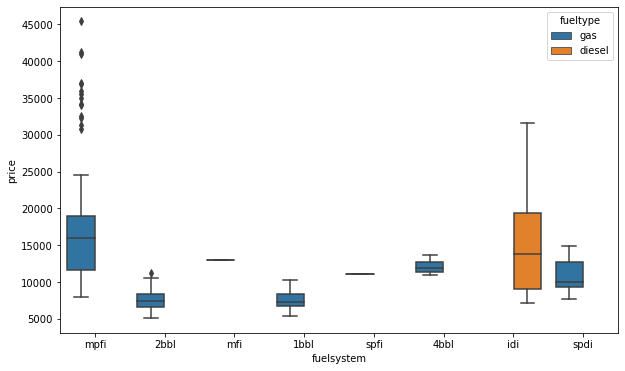

In [18]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = data)
plt.show()

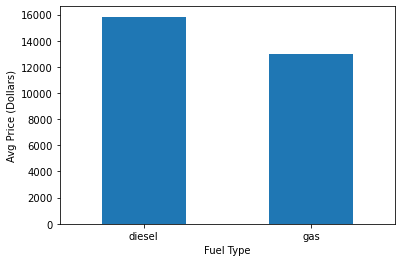

In [19]:
f_fuel_avg_price = data[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = f_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [27]:
auto = data[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price','mileage']]
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


In [28]:
# Converting categorial variables into dummy variables
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)
carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)
asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], axis = 1, inplace = True)

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'dummy' variables to conver integers into the floating numbers
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


In [31]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.358265,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Specify target variable
y_train = df_train.pop('price')

In [33]:
# Specify all the independent variables
x_train = df_train

In [34]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train = sm.add_constant(x_train)
lm = sm.OLS(y_train,x_train).fit()   # Running the linear model using all the variables
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     48.18
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.64e-50
Time:                        22:39:57   Log-Likelihood:                 196.45
No. Observations:                 143   AIC:                            -336.9
Df Residuals:                     115   BIC:                            -253.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0935      0.146      0.639      0.5

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

col = x_train.columns[rfe.support_]
col


Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'mileage',
       'four', 'twelve', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = x_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     81.91
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.26e-51
Time:                        22:41:18   Log-Likelihood:                 158.15
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     132   BIC:                            -261.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0291      0.061      0.479      0.6

In [38]:
# Dropping curbweight as p-value is high.
X_train_new1 = X_train_rfe.drop(["twelve"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     91.36
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.58e-52
Time:                        22:42:01   Log-Likelihood:                 157.92
No. Observations:                 143   AIC:                            -295.8
Df Residuals:                     133   BIC:                            -266.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0357      0.060      0.597      0.5

In [39]:
# Dropping hardtop as p value is high.
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)

# Final Model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     101.5
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.77e-53
Time:                        22:42:36   Log-Likelihood:                 156.68
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     134   BIC:                            -268.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0929      0.047      1.983      0.0

In [40]:
lm.rsquared

0.8583264318540487